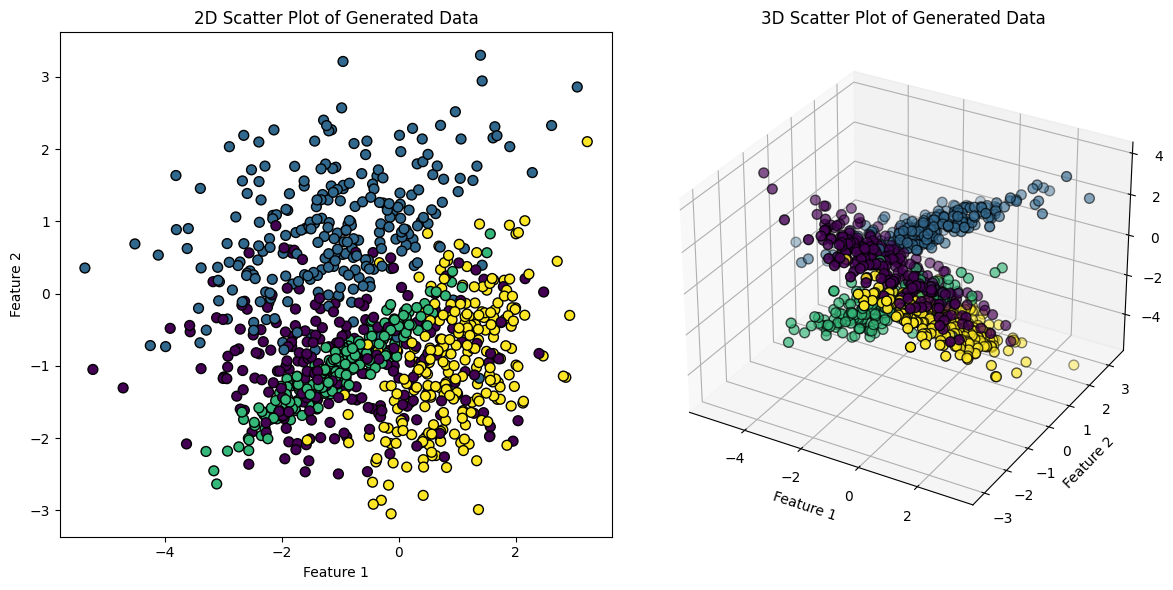

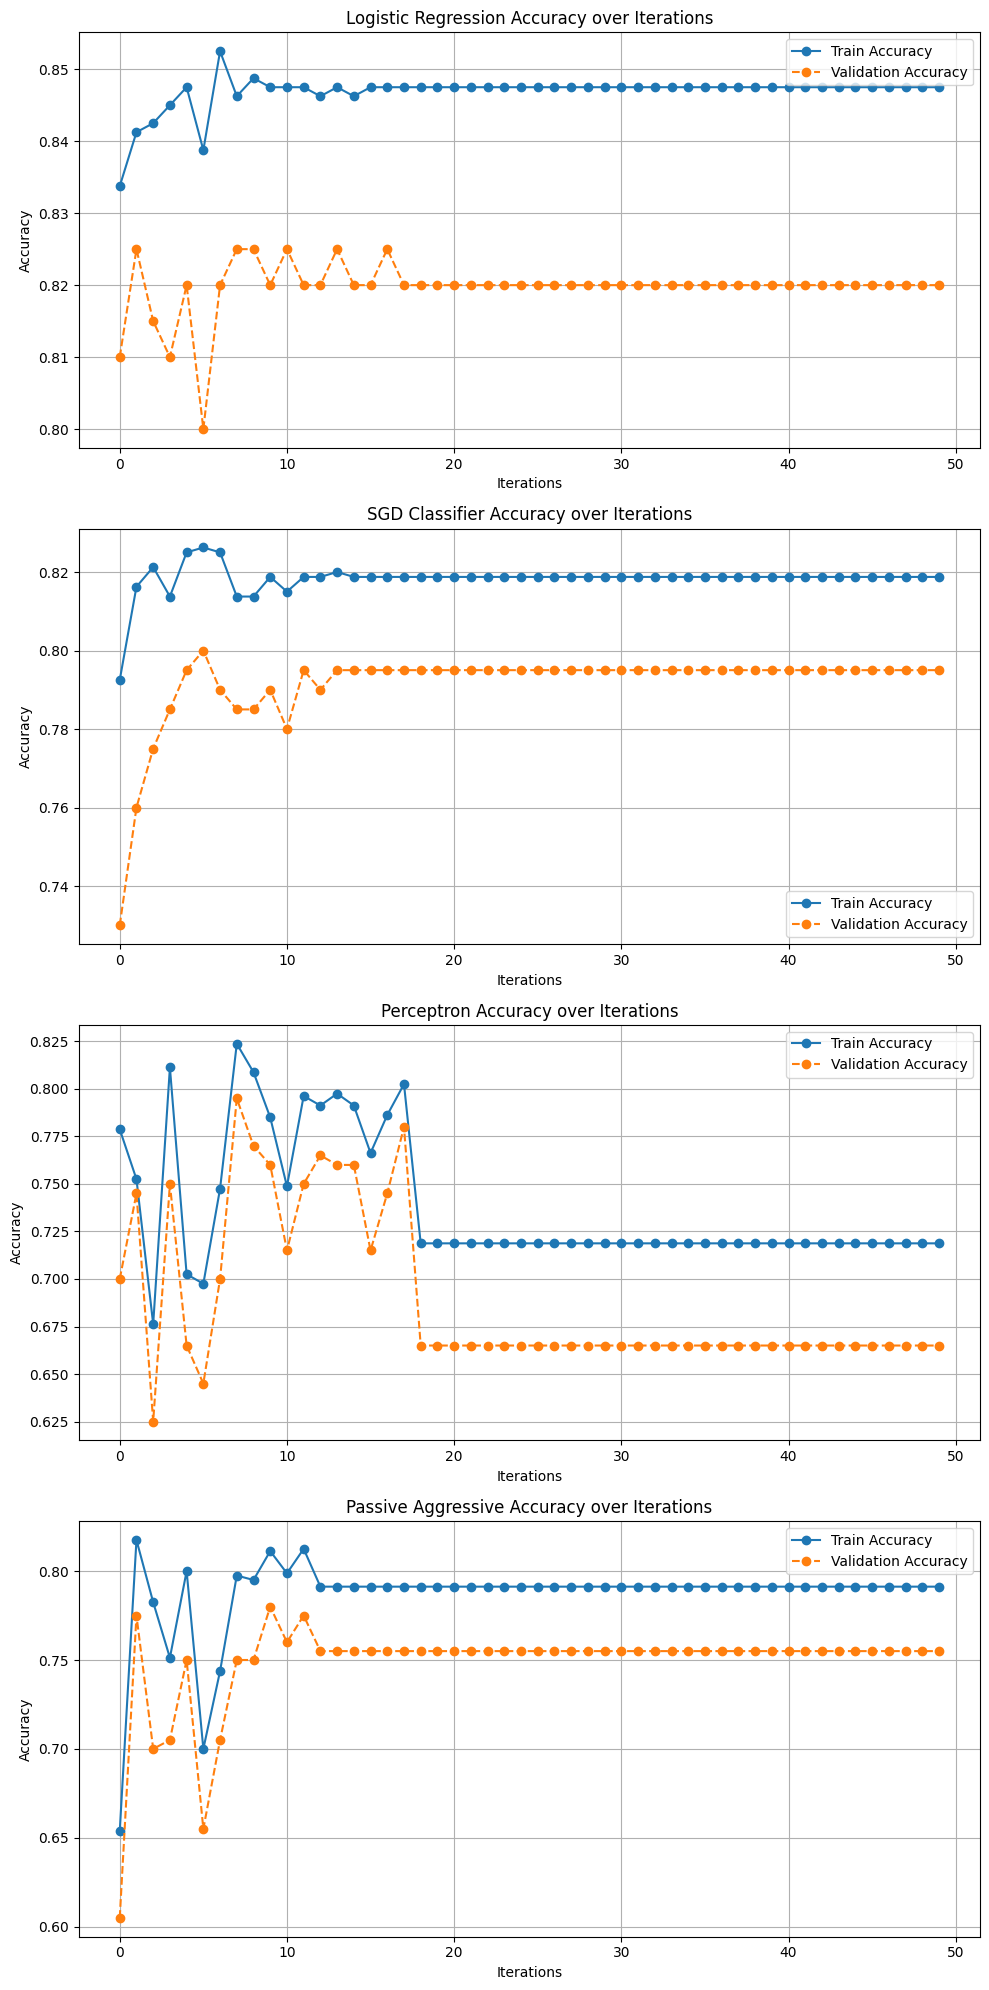

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from tqdm import tqdm
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

def generate_dataset():
    """Generate a synthetic classification dataset."""
    X, y = make_classification(
        n_samples=1000,
        n_features=3,
        n_classes=4,
        n_informative=3,
        n_redundant=0,
        n_repeated=0,
        n_clusters_per_class=1,
        class_sep=1,
        random_state=69
    )
    return X, y

def plot_generated_data(X, y):
    """Plot the generated dataset in 2D and 3D views."""
    plt.figure(figsize=(12, 6))

    # 2D plot
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title('2D Scatter Plot of Generated Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # 3D plot
    ax = plt.subplot(1, 2, 2, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
    ax.set_title('3D Scatter Plot of Generated Data')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    plt.tight_layout()
    plt.show()

def preprocess_data(X, y):
    """Split and scale the dataset."""
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_val_scaled = scaler.transform(x_val)
    return x_train_scaled, x_val_scaled, y_train, y_val

def train_model(model, x_train, y_train, x_val, y_val, iterations):
    """Train a model and evaluate it at each iteration."""
    train_acc = []
    val_acc = []
    for i in range(1, iterations + 1):
        model.max_iter = i
        model.fit(x_train, y_train)
        train_acc.append(model.score(x_train, y_train))
        val_acc.append(model.score(x_val, y_val))
    return train_acc, val_acc

def plot_results(acc_dict):
    """Plot training and validation accuracy for each model."""
    fig, ax = plt.subplots(len(acc_dict), 1, figsize=(10, 5 * len(acc_dict)))
    if len(acc_dict) == 1:
        ax = [ax]
    for i, (key, (train, val)) in enumerate(acc_dict.items()):
        ax[i].plot(train, 'o-', label='Train Accuracy')
        ax[i].plot(val, 'o--', label='Validation Accuracy')
        ax[i].set_title(f'{key} Accuracy over Iterations')
        ax[i].set_xlabel('Iterations')
        ax[i].set_ylabel('Accuracy')
        ax[i].legend()
        ax[i].grid(True)
    plt.tight_layout()
    plt.savefig('model_comparisons.png')
    plt.show()

def main():
    X, y = generate_dataset()
    plot_generated_data(X, y)
    x_train, x_val, y_train, y_val = preprocess_data(X, y)

    models = {
        'Logistic Regression': LogisticRegression(solver='sag', random_state=69),
        'SGD Classifier': SGDClassifier(max_iter=1, learning_rate='constant', eta0=0.01, alpha=0.0001, random_state=69),
        'Perceptron': Perceptron(max_iter=1, eta0=1.0, random_state=69),
        'Passive Aggressive': PassiveAggressiveClassifier(max_iter=1, random_state=69)
    }

    acc_dict = {}
    for name, model in models.items():
        train_acc, val_acc = train_model(model, x_train, y_train, x_val, y_val, 50)
        acc_dict[name] = (train_acc, val_acc)

    plot_results(acc_dict)

if __name__ == '__main__':
    main()


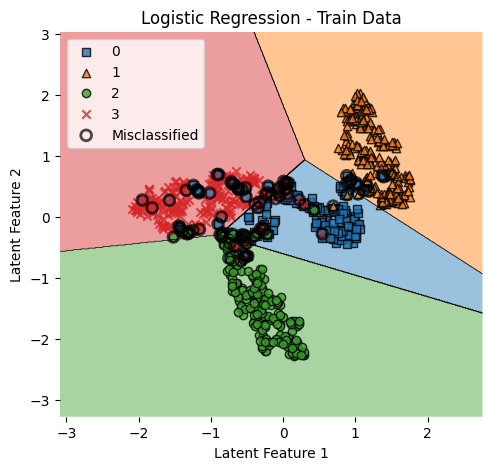

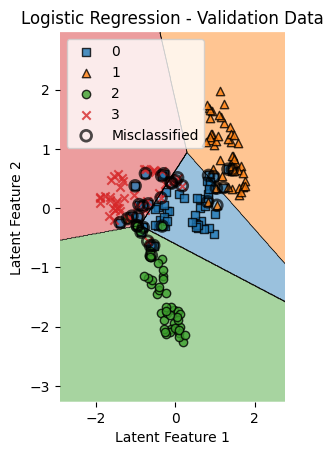

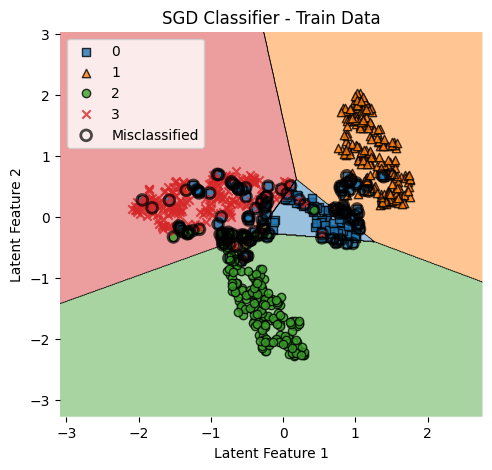

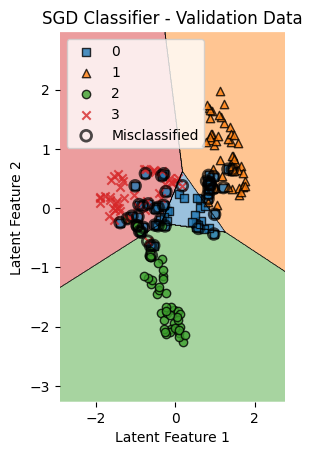

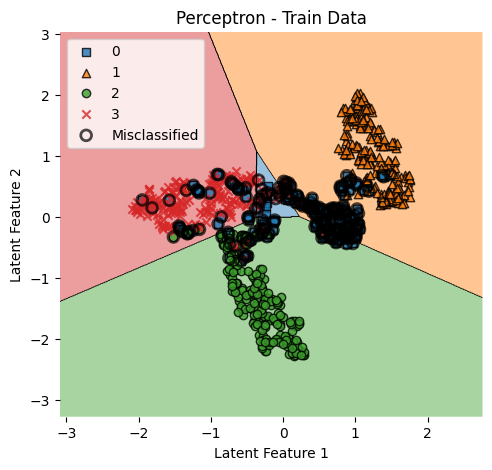

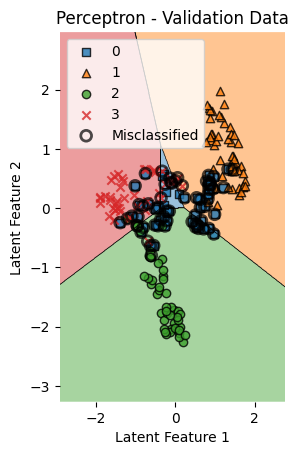

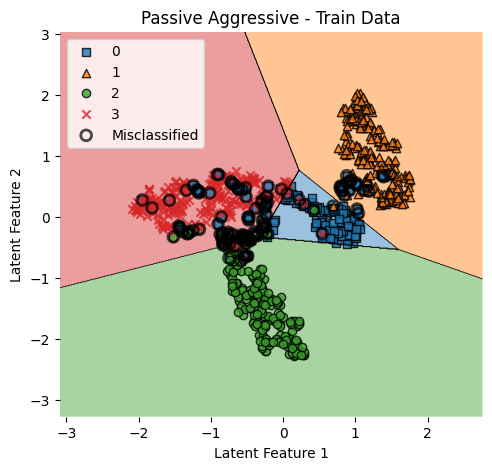

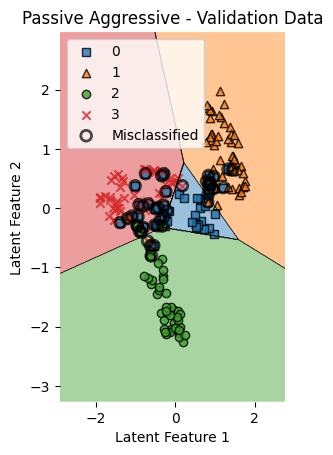

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Functions for dataset generation and preprocessing
def generate_dataset():
    X, y = make_classification(n_samples=1000, n_features=3, n_classes=4, n_informative=3,
                               n_redundant=0, n_repeated=0, n_clusters_per_class=1,
                               class_sep=1, random_state=69)
    return X, y

def preprocess_data(X, y, test_size=0.2, scale=True):
    x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=69)
    if scale:
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train)
        x_val = scaler.transform(x_val)
    return x_train, x_val, y_train, y_val

# Functions for model training and plotting
def train_model(model, x_train, y_train, x_val, y_val, iterations):
    train_acc, val_acc = [], []
    for i in range(1, iterations + 1):
        model.set_params(max_iter=i)
        model.fit(x_train, y_train)
        train_acc.append(model.score(x_train, y_train))
        val_acc.append(model.score(x_val, y_val))
    return train_acc, val_acc

def plot_decision_region(x, y, model, title):
    scatter_highlight_kwargs = {'s': 60, 'label': 'Misclassified', 'alpha': 0.7, 'linewidth':2}
    ax = plot_decision_regions(x, y, clf=model, zoom_factor=1., legend=0,
                               X_highlight=x[y != model.predict(x)],
                               scatter_highlight_kwargs=scatter_highlight_kwargs)
    ax.legend(loc='upper left')
    ax.set_title(title)
    ax.set_xlabel('Latent Feature 1')
    ax.set_ylabel('Latent Feature 2')
    plt.show()

# Main workflow
def main():
    X, y = generate_dataset()
    X_reduced = TSNE(n_components=2, random_state=69).fit_transform(X, y)
    x_train_r, x_val_r, y_train_r, y_val_r = preprocess_data(X_reduced, y)

    models = {
        'Logistic Regression': LogisticRegression(solver='sag', random_state=69),
        'SGD Classifier': SGDClassifier(max_iter=1, learning_rate='constant', eta0=0.01, random_state=69),
        'Perceptron': Perceptron(max_iter=1, eta0=1.0, random_state=69),
        'Passive Aggressive': PassiveAggressiveClassifier(max_iter=1, random_state=69)
    }

    for name, model in models.items():
        model.set_params(max_iter=50)  # Set iterations to 50 for training
        model.fit(x_train_r, y_train_r)
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plot_decision_region(x_train_r, y_train_r, model, f'{name} - Train Data')
        plt.subplot(1, 2, 2)
        plot_decision_region(x_val_r, y_val_r, model, f'{name} - Validation Data')

if __name__ == '__main__':
    main()
